In [0]:
# MNIST dataset contains grayscale images of handwritten digits
# MNIST is the hello world of deep learning

# Total images: 70,000
  # Training: 60,000
  # Test: 10,000

In [0]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
!pip install --upgrade tensorflow

In [0]:
# Upgradation done!

In [111]:
import tensorflow as tf
print(tf.__version__)

2.1.0


### **1-** **Loading the dataset**

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
train_images[0]
print('ndim:',train_images[0].ndim)
print('shape of the first training image:', train_images[0].shape)
print('max value:',train_images[0].max())

ndim: 2
shape of the first training image: (28, 28)
max value: 255


In [0]:
print('ndim:',test_images[0].ndim)
print('shape of the first test image:', test_images[0].shape)

ndim: 2
shape of the first test image: (28, 28)


In [0]:
print('About train_labels: \nsize:', train_labels.size)
print('ndim:',train_labels.ndim)
train_labels[0:20]

About train_labels: 
size: 60000
ndim: 1


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

### **2- Network Architecture**

In [0]:
# Now we will import models and layers from tensorflow.keras
# There are two types of models: Sequential & Functional API
# Dense layer or Fully connected layer: A layer in which each neuron is connected with all the previous neurons

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
my_network = models.Sequential()
my_network.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
my_network.add(layers.Dense(10, activation = 'softmax'))

In [0]:
# Activation function converts linearity to non-linearity
# The activation function of LAST layer depends upon the problem type
  # We are using softmax here (in the last layer mnist model)
    # Softmax returns the probability value against each output 

### **3- The Compilation Step**

In [0]:
my_network.compile(optimizer = 'rmsprop',
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

In [0]:
# rmsprop is a gradient descent optimizer
# categorical_crossentropy: This loss function is used for classification problem

#### **4- Preparing the image data**

In [0]:
# Preparing the image data:
train_images = train_images.reshape((60000,28*28))   # converting 3d to 2d
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32') / 255

In [0]:
print('ndim of whole test_images: ', train_images.ndim)
print('  it was \'3\' before')

ndim of whole test_images:  2
  it was '3' before


In [0]:
(train_images[0])
print(train_images[0].max())

1.0


#### **5- Preparing the labels**

In [0]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
print(train_labels[0])
print(train_labels[0].max())
train_labels.shape

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1.0


(60000, 10)

In [0]:
print(train_labels[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


#### **7- Training**

In [7]:
# Training is started now - Only training data is involved here:
my_network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2592 - accuracy: 0.9252
Epoch 2/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1054 - accuracy: 0.9687
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0694 - accuracy: 0.9793
Epoch 4/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0507 - accuracy: 0.9849
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0379 - accuracy: 0.9888


#### **8- Evaluation**

In [9]:
# Now evaluation is performed on the test data:
# .evaluate function returns 2 outputs: loss and accuracy
test_loss, test_acc = my_network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.0719 - accuracy: 0.9777


##### - You can predict a particular test image:

In [35]:
# You can also predict:
print(my_network.predict(test_images)[0:4])
print()
my_network.predict(test_images)[0:4].max(axis=1)

[[1.8003284e-08 1.8014153e-10 2.8579414e-06 1.0830265e-05 3.9230955e-11
  1.2471627e-08 2.2661242e-13 9.9997759e-01 5.4079610e-08 8.6339487e-06]
 [6.5537242e-11 1.2374713e-07 9.9999988e-01 5.6204561e-09 1.6682215e-20
  1.8538310e-11 2.9032927e-11 5.7781519e-18 3.1709899e-10 9.8262353e-17]
 [2.2143045e-07 9.9916971e-01 1.6351574e-04 1.1748055e-05 5.6295128e-05
  5.7656816e-06 1.2419429e-05 3.8047388e-04 1.9282397e-04 7.0076421e-06]
 [9.9990380e-01 2.5969578e-12 4.9638937e-05 3.2691659e-08 8.3994244e-08
  3.9452477e-08 1.0637744e-05 9.5817468e-06 5.8299503e-09 2.6061520e-05]]



array([0.9999776, 0.9999999, 0.9991697, 0.9999038], dtype=float32)

In [39]:
print(test_images.shape)
print('Dude you must understand that there are Ten Thousand(10,000) Test Images!')
print('Oh My God! Too many Images')
type(test_images)

(10000, 784)
Dude you must understand that there are Ten Thousand(10,000) Test Images!
Oh My God! Too many Images


numpy.ndarray

##### - Visualization

In [0]:
# For visualization we will load the mnist dataset again

In [0]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [41]:
test_images.shape

(10000, 28, 28)

In [175]:
train_labels[0:25]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1], dtype=uint8)

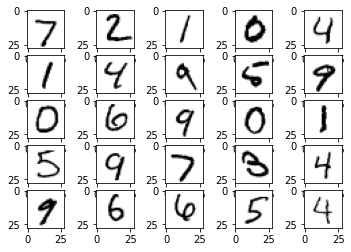

In [181]:
# displaying the first 25 images of train_images:
import matplotlib.pyplot as plt

# digit = train_images[0]
# plt.imshow(digit, cmap=plt.cm.binary)

f, axarr = plt.subplots(5,5)
for i in range(5):
  axarr[0,i].imshow(test_images[i], cmap=plt.cm.binary)
for i in range(5):
  axarr[1,i].imshow(test_images[5+i], cmap=plt.cm.binary)
for i in range(5):
  axarr[2,i].imshow(test_images[10+i], cmap=plt.cm.binary)
for i in range(5):
  axarr[3,i].imshow(test_images[15+i], cmap=plt.cm.binary)
for i in range(5):
  axarr[4,i].imshow(test_images[20+i], cmap=plt.cm.binary)

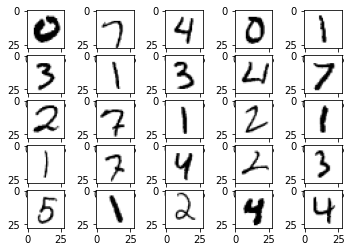

In [182]:
f, axarr = plt.subplots(5,5)
for i in range(5):
  axarr[0,i].imshow(test_images[25+i], cmap=plt.cm.binary)
for i in range(5):
  axarr[1,i].imshow(test_images[30+i], cmap=plt.cm.binary)
for i in range(5):
  axarr[2,i].imshow(test_images[35+i], cmap=plt.cm.binary)
for i in range(5):
  axarr[3,i].imshow(test_images[40+i], cmap=plt.cm.binary)
for i in range(5):
  axarr[4,i].imshow(test_images[45+i], cmap=plt.cm.binary)

#
## An Extra Thing:
#### Comparing prediction with test_labels

In [123]:
actual_test_labels = test_labels[0:500]
print(test_labels[0:100])
print(test_labels[0:100].mean())

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
4.34


In [0]:
# For PREDICTION:
# To observe the Prediction, we will prepare the image data:
train_images = train_images.reshape((60000,28*28))   # converting 3d to 2d
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32') / 255


In [185]:
# I've already run the training of my_network that's why prediction is done directly here:
#print(my_network.predict(test_images)[0:4])
predicted_test_labels = my_network.predict(test_images)[:].argmax(axis=1)
print('Max:')
print(my_network.predict(test_images)[0:100].max(axis=1))
print('Argmax:')
print(my_network.predict(test_images)[0:100].argmax(axis=1))

Max:
[0.9999776  0.9999999  0.9991697  0.9999038  0.99511236 0.9996101
 0.9990048  0.9991309  0.9955525  0.9998933  0.99999905 0.99995375
 0.9999747  0.99996877 0.9999919  0.9987495  0.99940586 0.9999286
 0.59945714 0.9999398  0.9971077  0.9977946  0.99999833 0.9999994
 0.9915549  0.99999845 0.9998222  0.9999207  0.9999807  0.9999441
 0.9999839  0.9991229  0.99999523 0.9405101  0.99998593 0.99998474
 0.99943596 0.99995816 0.98948425 0.9999918  0.9985268  0.99978226
 0.9993068  0.99942315 0.9990823  0.9981699  0.99991536 0.9999912
 0.99997735 0.9985416  0.9988506  0.9998248  0.9999435  0.9965005
 1.         0.99997485 0.9999951  0.998494   0.9999404  0.9973627
 0.99999726 0.969517   0.9073806  0.9852046  0.99985373 0.91045785
 0.99932873 0.9999511  0.99998057 0.99999845 0.99999595 1.
 0.99993014 0.9997317  0.99990404 0.9997507  0.99991024 0.99992967
 0.99836    0.9994282  0.98449117 0.99976    1.         0.99979466
 0.9999263  0.9999962  0.99994624 0.99987805 1.         0.9998085
 0.996

In [130]:
print('Comparing first 500 test labels:')
op = actual_test_labels - predicted_test_labels
print(op)
len(op)

Comparing first 500 test labels:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -5  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0

500

In [137]:
op[[114,115,116,117,118]]
print(op[115])
print(actual_test_labels[115])
print(predicted_test_labels[115])

-5
4
9


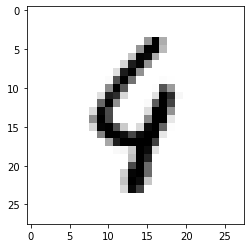

In [183]:
# For visualization of nonsense:

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

digit = test_images[115]
plt.imshow(digit, cmap=plt.cm.binary)

3
2


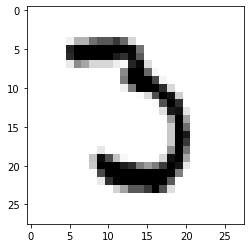

In [151]:
# more nonsense samples
op[158]  # =1
print(actual_test_labels[158])
print(predicted_test_labels[158])

digit = test_images[158]
plt.imshow(digit, cmap=plt.cm.binary)

4
2


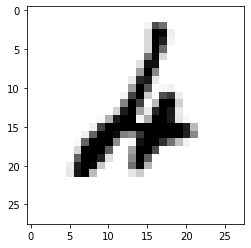

In [157]:
# more nonsense samples
op[247]  # =2
print(actual_test_labels[247])
print(predicted_test_labels[247])

digit = test_images[247]
plt.imshow(digit, cmap=plt.cm.binary)

6
0


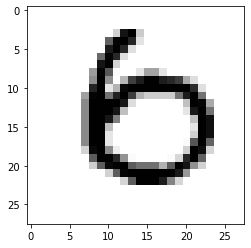

In [159]:
# more nonsense samples
op[259]  # = 6
print(actual_test_labels[259])
print(predicted_test_labels[259])

digit = test_images[259]
plt.imshow(digit, cmap=plt.cm.binary)

2
7


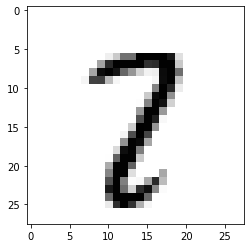

In [162]:
# more nonsense samples
op[321]  # = -5
print(actual_test_labels[321])
print(predicted_test_labels[321])

digit = test_images[321]
plt.imshow(digit, cmap=plt.cm.binary)

5
3


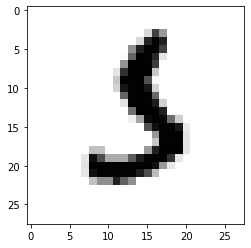

In [167]:
# more nonsense samples
op[340]  # = 2
print(actual_test_labels[340])
print(predicted_test_labels[340])

digit = test_images[340]
plt.imshow(digit, cmap=plt.cm.binary)

3
7


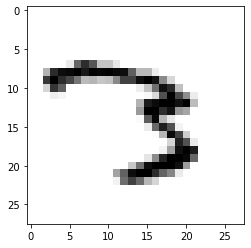

In [171]:
# more nonsense samples
op[381]  # = -4
print(actual_test_labels[381])
print(predicted_test_labels[381])

digit = test_images[381]
plt.imshow(digit, cmap=plt.cm.binary)

In [208]:
print('Comparing all test labels:')
op = test_labels - predicted_test_labels
len(op) # = 10,000
print('No. of wrong predictions out of 10,000:')
print(len(op[op != 0])) # = 223
(223*100)/10000 # = 2.23
print('This is just 2.23% loss \nSo the Accuracy is:')
100-2.23

Comparing all test labels:
No. of wrong predictions out of 10,000:
223
This is just 2.23% loss 
So the Accuracy is:


97.77

#
### Here I'm pleased to say that our calculated accuracy is matching with the accuracy provided by the evaluate funtion.
## Alhamdulillah ^^^ Alhamdulillah ^^^ Alhamdulillah
### First project has been completed here successfully!
## Congratulations SAAD!!!
## ALHAMDULILLAH means **Thanks to ALLAH**